In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

import time

In [2]:
from functools import wraps
import time


def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [3]:
rows_number = []
for i in range(1, 85):
    rows_number.append(100*i)
rows_number

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400]

In [4]:
datasets = []
for i in rows_number:
    total_columns = i
    cols = []
    for column_number in range(1, total_columns + 1):
        cols.append('column' + str(column_number))
    arr = make_blobs(n_samples=1000, n_features=total_columns, random_state=20, centers=3, cluster_std=1)
    data = pd.DataFrame(data=arr[0], columns=cols)
    datasets.append(data)
# datasets

In [5]:
data_rows = []
time_spended = []
for data in datasets:
    start_time = time.perf_counter()
    data.corr()
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_spended.append(total_time)
    data_rows.append(data.shape[1])
display(data_rows)
display(time_spended)
columns = ['rows', 'time']
timedata = pd.DataFrame(data=zip(data_rows, time_spended), columns=columns)

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400]

[0.012840196999604814,
 0.04756502400005047,
 0.10645610200026567,
 0.1889069130002099,
 0.2948272379999253,
 0.4245443330000853,
 0.5831199720000768,
 0.7546207370000957,
 0.9668750390001151,
 1.198171371999706,
 1.430450017000112,
 1.696224183999675,
 1.9895186879998619,
 2.306084385000304,
 2.6534447469998668,
 3.0142584440000064,
 3.400711094000144,
 3.811877693000042,
 4.247450311000193,
 4.731551361000129,
 5.1954418919999625,
 5.711105481999766,
 6.2553418180000335,
 6.79136087400002,
 7.356937857000048,
 7.958994867000001,
 8.58571456000027,
 9.232868172000053,
 9.934682705999876,
 10.62902836100011,
 11.337981765000222,
 12.071522697999626,
 12.82997988299985,
 13.667361195000012,
 14.432646702000056,
 15.294095084999753,
 16.126443391000066,
 17.027557186000195,
 17.921218974000112,
 18.859179547000167,
 19.83195405100014,
 20.807662664000418,
 21.839192910999827,
 22.82349753299968,
 23.884133840999766,
 24.958191528000043,
 26.053411998999763,
 27.197466983999675,
 28.32908

In [6]:
columns = ['columns', 'time']
timedata = pd.DataFrame(data=zip(data_rows, time_spended), columns=columns)

In [7]:
timedata

,columns,time
0,100,0.012840
1,200,0.047565
2,300,0.106456
3,400,0.188907
4,500,0.294827
...,...,...
79,8000,75.679971
80,8100,77.596328
81,8200,79.512512
82,8300,81.429405


In [8]:
import math
columns2 = ['x', 'x^2']
y_data = [x * math.log(x) for x in data_rows]
parabola = pd.DataFrame(data=zip(data_rows, y_data), columns=columns2)
parabola

,x,x^2
0,100,460.517019
1,200,1059.663473
2,300,1711.134742
3,400,2396.585819
4,500,3107.304049
...,...,...
79,8000,71897.574565
80,8100,72896.916659
81,8200,73897.493353
82,8300,74899.289588


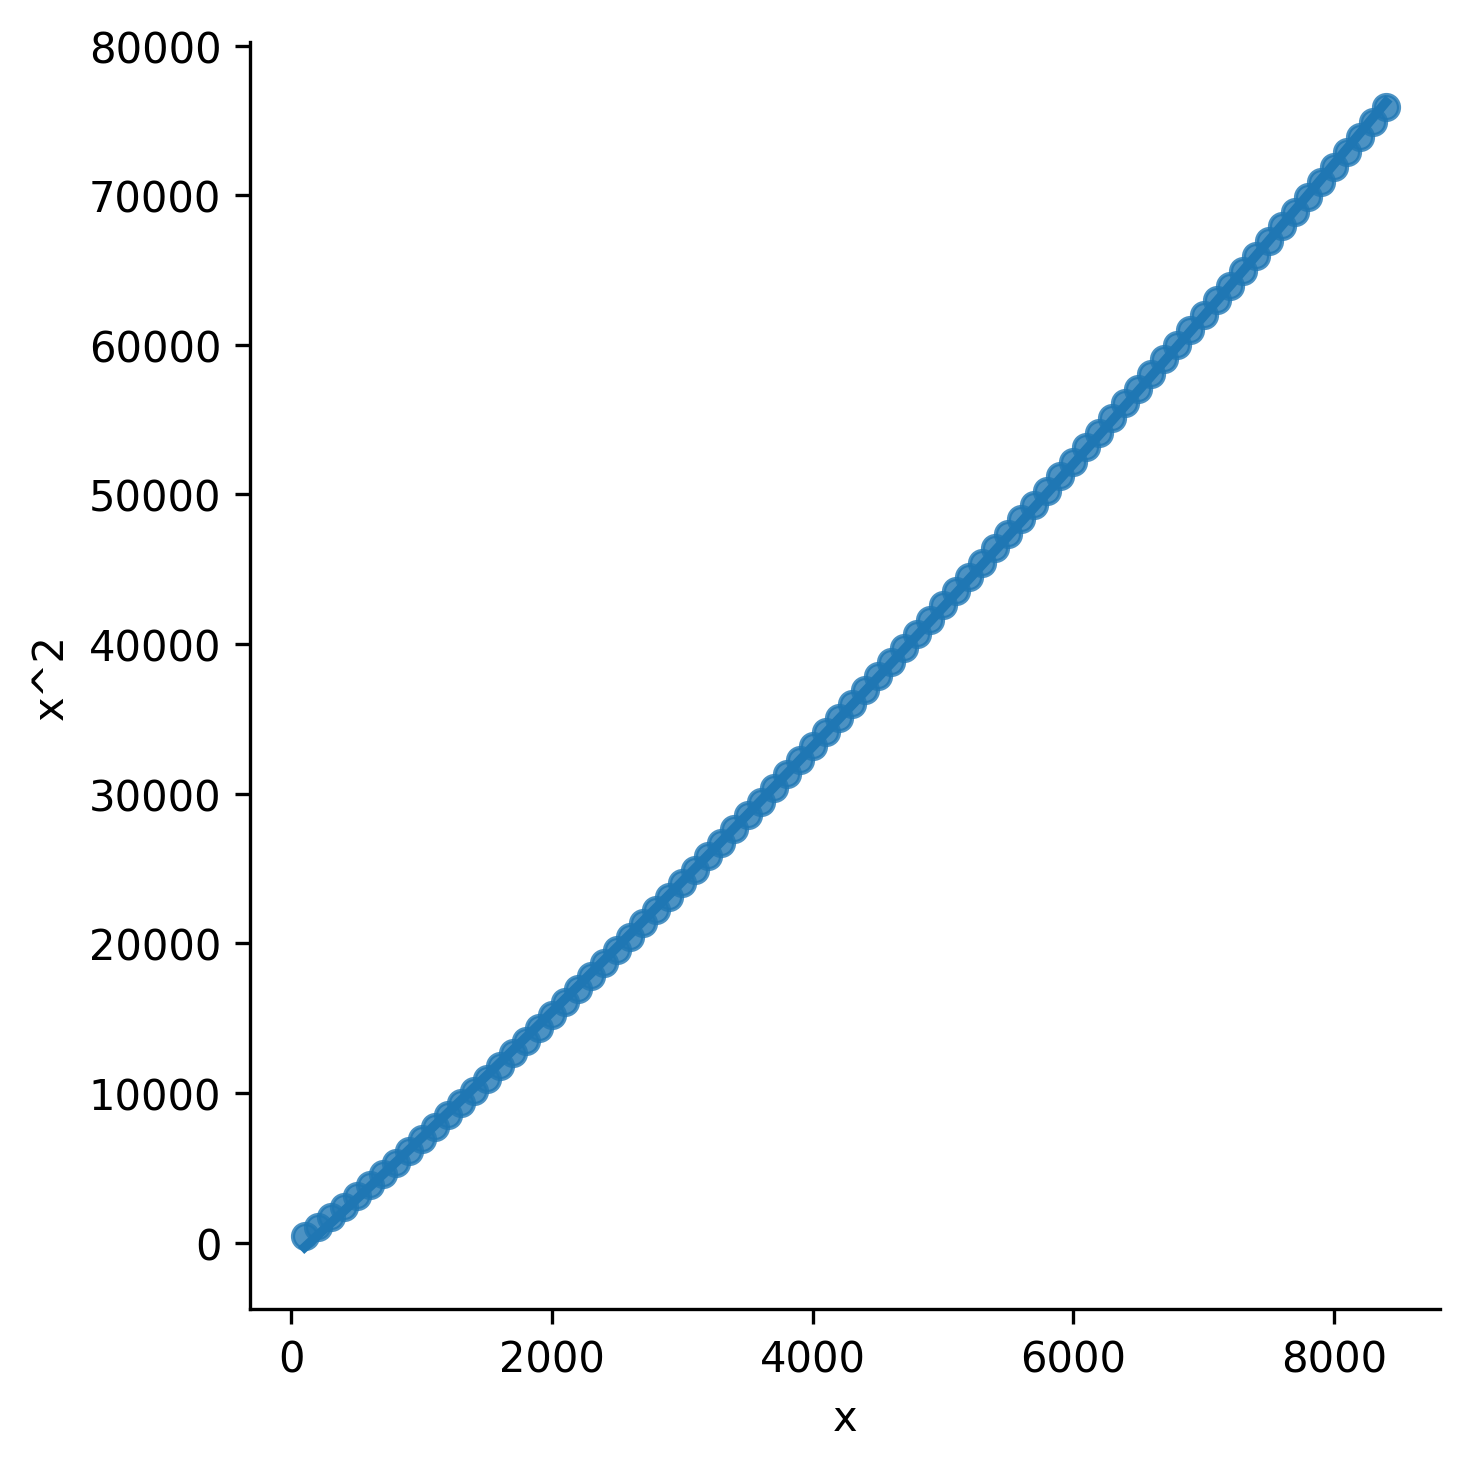

In [9]:
sns.lmplot(data=parabola, x='x', y='x^2', order=2)

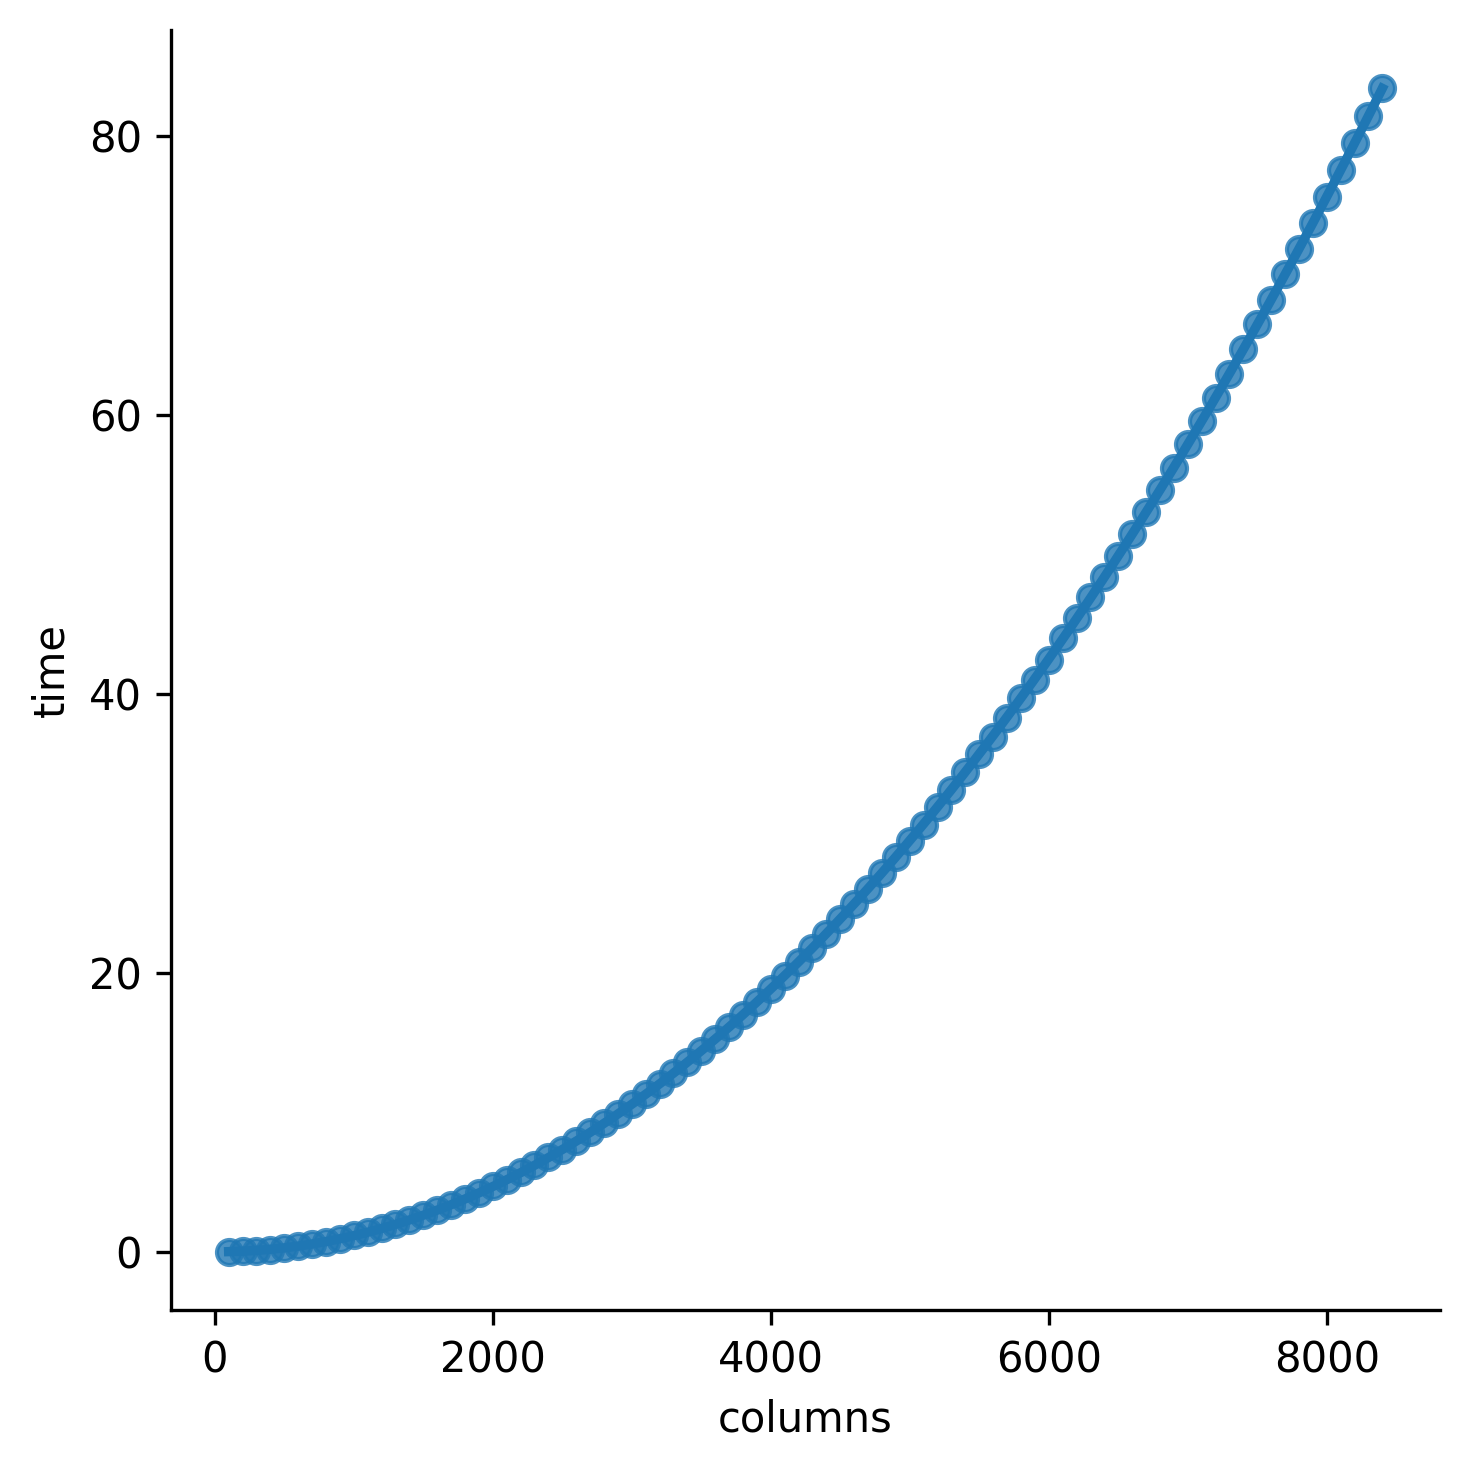

In [10]:
sns.lmplot(data=timedata, x='columns', y='time', order=2)
plt.show()

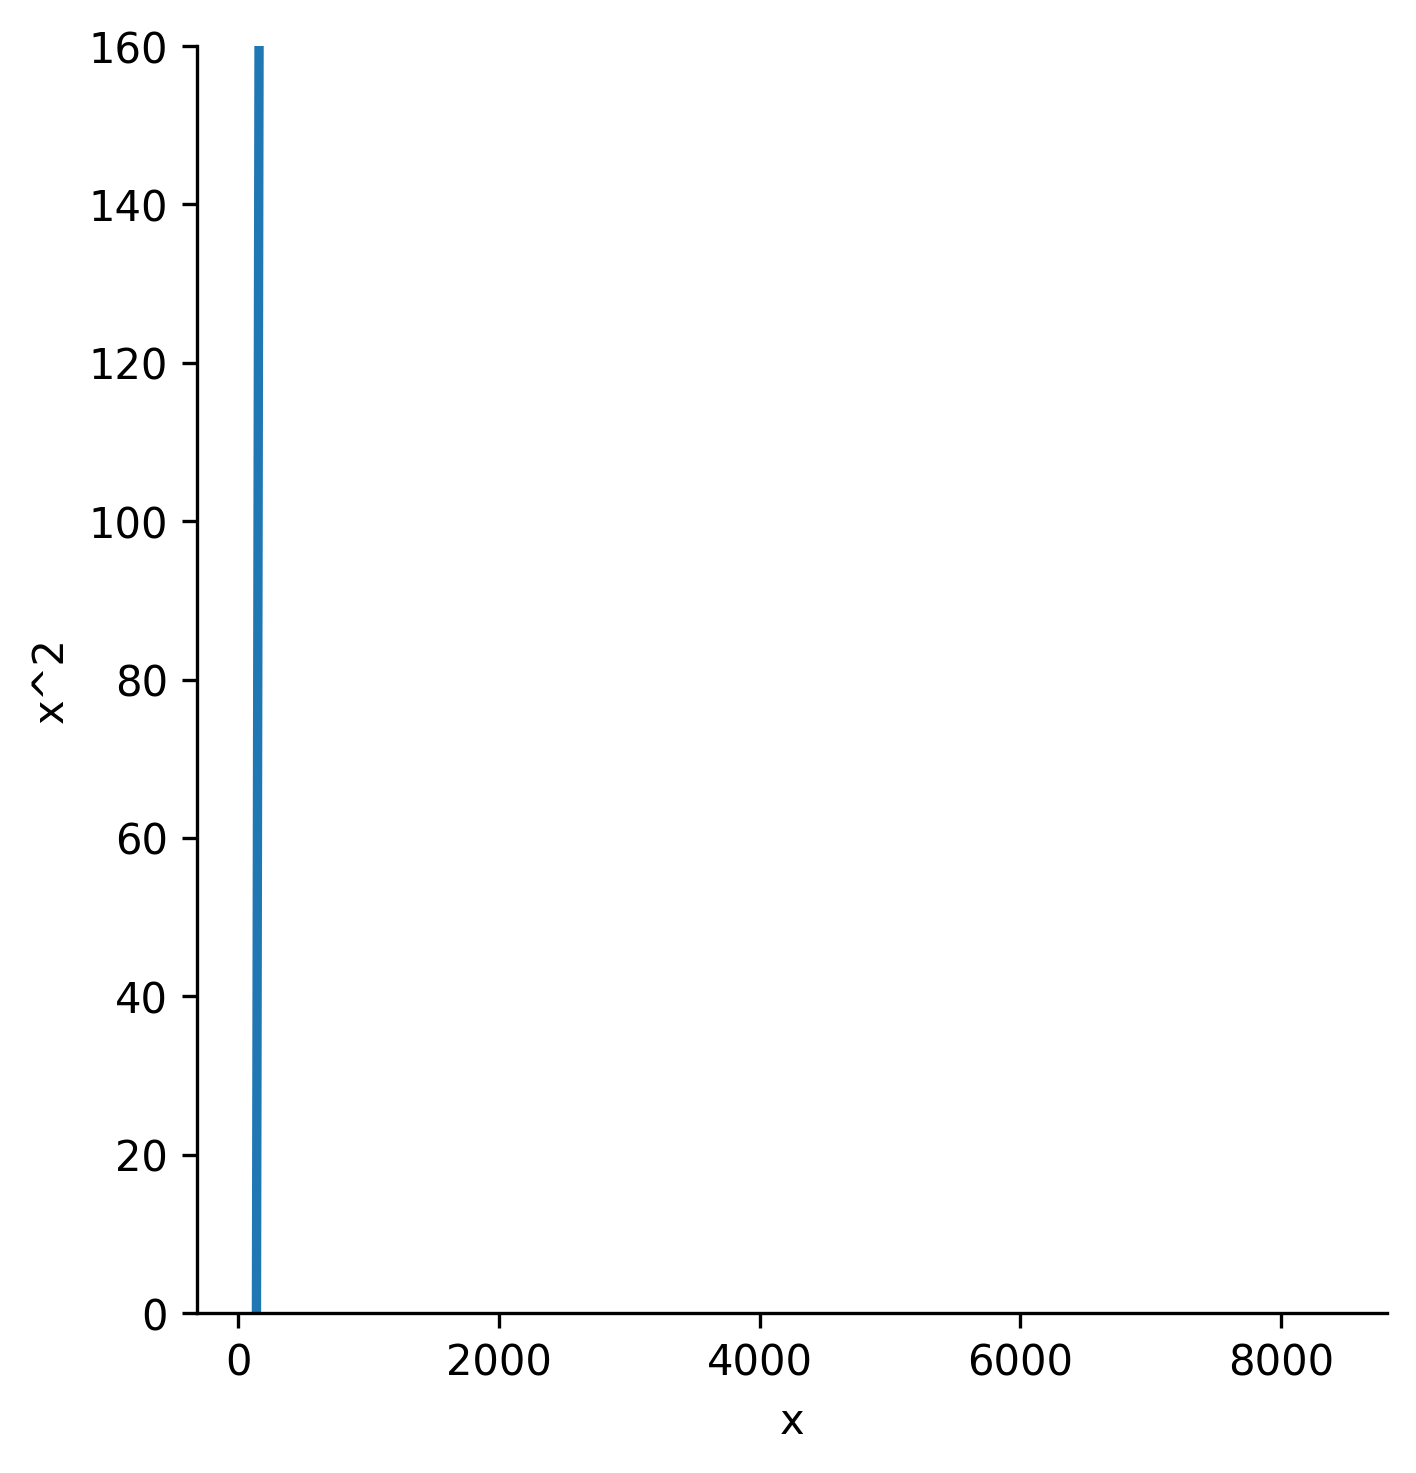

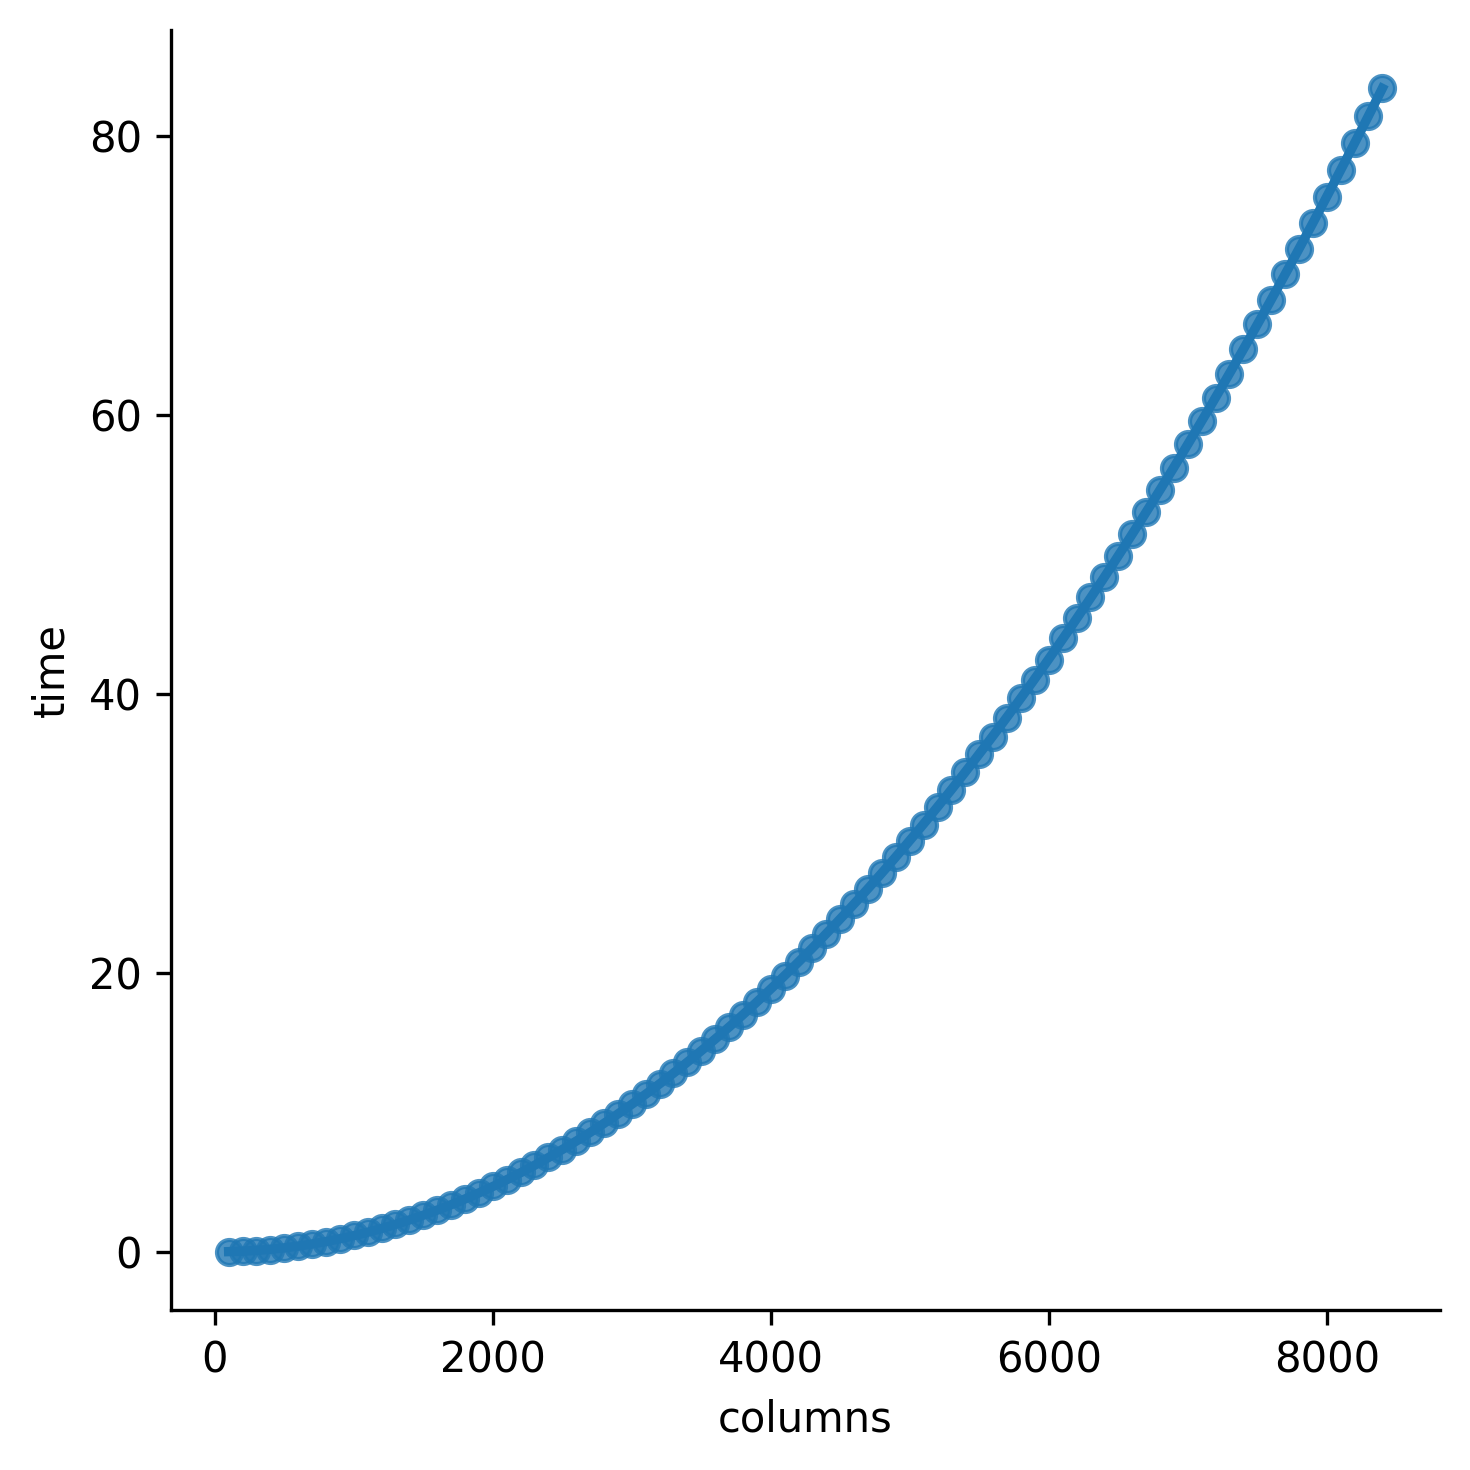

In [12]:
g = sns.lmplot(data=parabola, x='x', y='x^2', order=2)
g.set(ylim=(0, 160))
sns.lmplot(data=timedata, x='columns', y='time', order=2)